 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [121]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [75]:
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_pd = pd.read_csv(whale_returns_csv, index_col = "Date", parse_dates=True)
whale_pd.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [76]:
# Reading whale returns


In [77]:
# Count nulls
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [78]:
# Drop nulls
whale_pd.dropna(inplace=True)
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [79]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_pd = pd.read_csv(algo_returns_csv, index_col = "Date", parse_dates=True)
algo_pd.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [80]:
# Count nulls
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [81]:
# Drop nulls
algo_pd.dropna(inplace=True)
algo_pd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [82]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_history_pd = pd.read_csv(sp_tsx_history_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
#sp_tsx_history_pd.set_index(pd.to_datetime(sp_tsx_history_pd['date'], infer_datetime_format=True), inplace=True)
sp_tsx_history_pd.head()



,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [83]:
# Check Data Types
sp_tsx_history_pd.info()
sp_tsx_history_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1818 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [84]:
# Fix Data Types
sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].str.replace("$" , "")
sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].str.replace("," , "")
sp_tsx_history_pd["Close"] = sp_tsx_history_pd["Close"].astype("float")
sp_tsx_history_pd.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [85]:
# Calculate Daily Returns
daily_returns = sp_tsx_history_pd.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [86]:
#daily_returns.isnull().sum()
# Drop nulls
#algo_pd.isnull().sum()
#sp_tsx_history_pd.info()
#sp_tsx_history_pd.head()
sp_tsx_history_pd.isnull().sum()
#algo_pd.dropna(inplace=True)
#algo_pd.isnull().sum()

Close    0
dtype: int64

In [87]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns.columns= ["TSX CLOSE"]
daily_returns.head()

,TSX CLOSE
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [88]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
total_returns = pd.concat([whale_pd, algo_pd, daily_returns], axis = "columns", join = "inner")
total_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX CLOSE
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

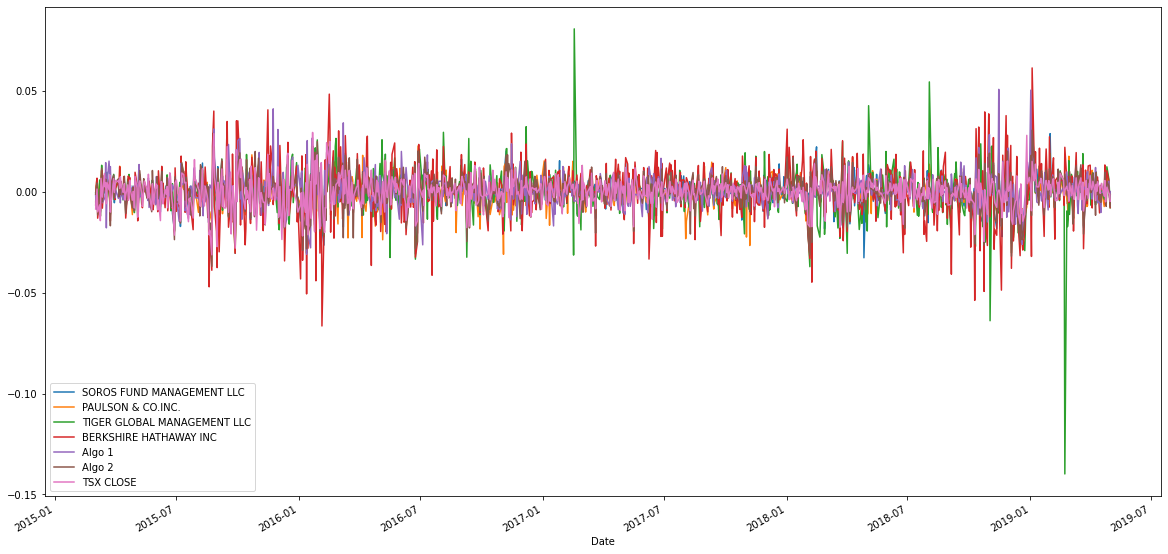

In [89]:
# Plot daily returns of all portfolios
total_returns.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

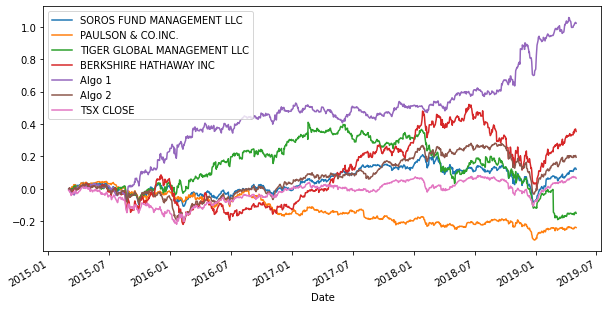

In [90]:
# Calculate cumulative returns of all portfolios
cumalative_returns = (1 + total_returns).cumprod() - 1
cumalative_returns.head()
# Plot cumulative returns
cumalative_returns.plot(figsize = (10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

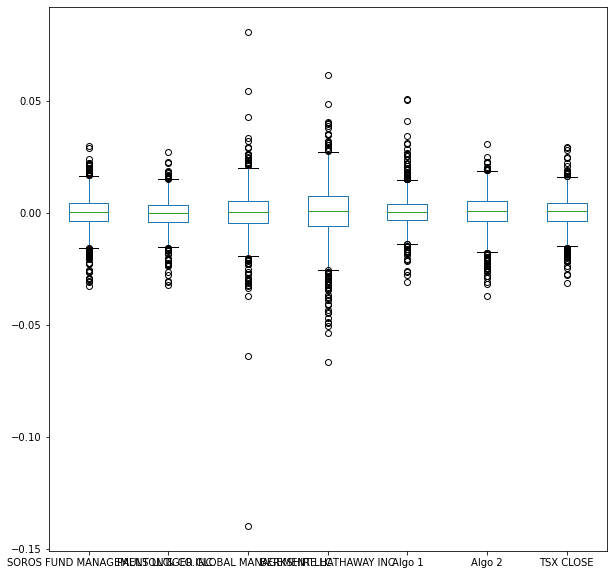

In [122]:
# Box plot to visually show risk
total_returns.plot.box(figsize = (10,10))

### Calculate Standard Deviations

In [92]:
# Calculate the daily standard deviations of all portfolios
cumalative_std = cumalative_returns.std()
print (cumalative_std)

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
TSX CLOSE                      0.064354
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [93]:
# Calculate  the daily standard deviation of S&P TSX 60
print(cumalative_std["TSX CLOSE"]) 

#daily_returns.columns= ["TSX CLOSE"]
#daily_returns.head()
# Determine which portfolios are riskier than the S&P TSX 60
cumalative_risk = cumalative_std[cumalative_std > cumalative_std["TSX CLOSE"]]
print(cumalative_risk)

0.06435360632809135
SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
dtype: float64


### Calculate the Annualized Standard Deviation

In [94]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = cumalative_std * np.sqrt(252)
print(annual_std)

SOROS FUND MANAGEMENT LLC      1.115525
PAULSON & CO.INC.              1.440370
TIGER GLOBAL MANAGEMENT LLC    2.360896
BERKSHIRE HATHAWAY INC         3.125227
Algo 1                         4.108944
Algo 2                         1.851072
TSX CLOSE                      1.021582
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
...                               ...                 ...   
2019-04-25                   0.015754            0.006179   
2019-04-26                   0.015466            0.006044   
2019-04-29                   0.015122            0.005417   
2019-04-30                   0.014305            0.004771   
2019-05-01                   0.013619            0.004658   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN             

<AxesSubplot:xlabel='Date'>

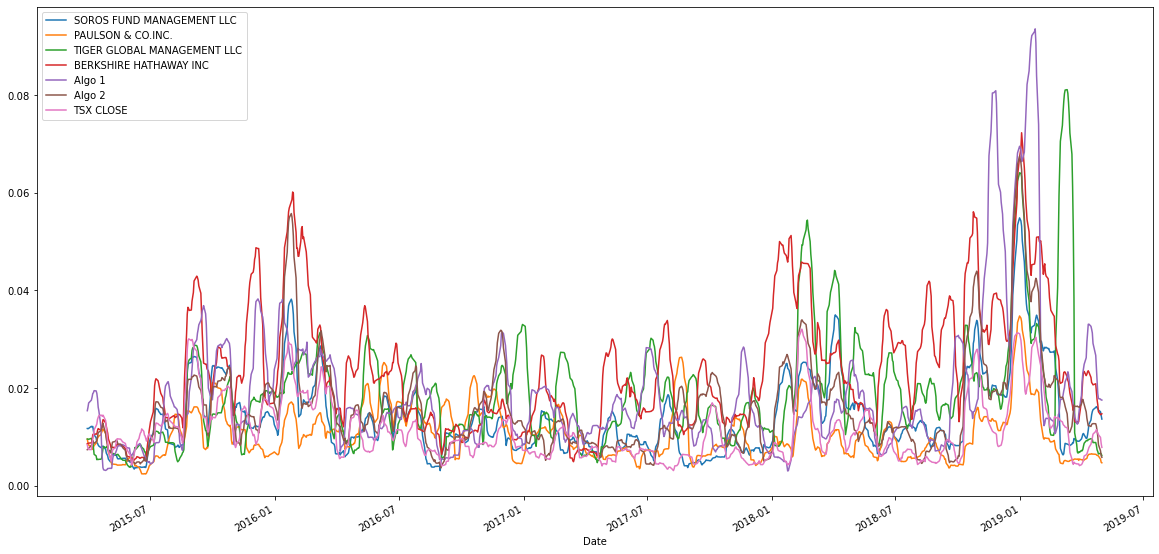

In [95]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_rolling_return = cumalative_returns.rolling(window=21).std()
print(std_rolling_return)
# Plot the rolling standard deviation
std_rolling_return.plot(figsize = (20,10))

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX CLOSE
SOROS FUND MANAGEMENT LLC,1.000000,-0.599250,0.428731,0.879331,0.419924,0.898351,0.809598
PAULSON & CO.INC.,-0.599250,1.000000,-0.167546,-0.710741,-0.876459,-0.736731,-0.604204
TIGER GLOBAL MANAGEMENT LLC,0.428731,-0.167546,1.000000,0.064462,0.047300,0.242755,0.370814
BERKSHIRE HATHAWAY INC,0.879331,-0.710741,0.064462,1.000000,0.524672,0.920725,0.720103
Algo 1,0.419924,-0.876459,0.047300,0.524672,1.000000,0.590275,0.528311
Algo 2,0.898351,-0.736731,0.242755,0.920725,0.590275,1.000000,0.886327
TSX CLOSE,0.809598,-0.604204,0.370814,0.720103,0.528311,0.886327,1.000000


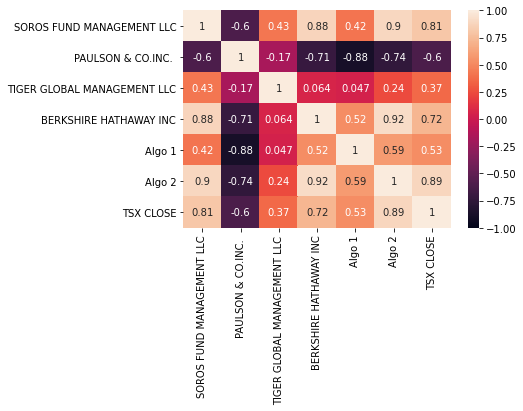

In [96]:
# Calculate the correlation
import seaborn as sns

correlation = cumalative_returns.corr()

# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1, annot= True)
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

2.2


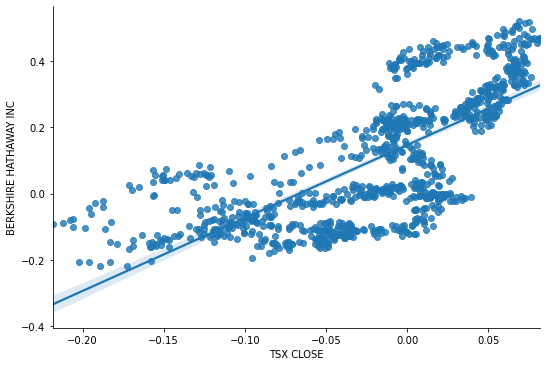

In [97]:
%matplotlib inline
# Calculate covariance of a single portfolio
covariance = cumalative_returns["BERKSHIRE HATHAWAY INC"].cov(cumalative_returns["TSX CLOSE"])
covariance
#cumalative_returns.rolling(window=21)
# Calculate variance of S&P TSX
variance = cumalative_returns["TSX CLOSE"].var()
variance
# Computing beta
bks_beta = (covariance / variance).round(2)
print(bks_beta)
# Plot beta trend
import seaborn as sns
sns.lmplot(x='TSX CLOSE', y='BERKSHIRE HATHAWAY INC', data=cumalative_returns, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [98]:
# Use `ewm` to calculate the rolling window
exp_21= cumalative_returns.ewm(halflife=21)
print(exp_21)

ExponentialMovingWindow [com=29.799346392775035,min_periods=1,adjust=True,ignore_na=False,axis=0]


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [99]:
# Annualized Sharpe Ratios
sharpe_ratios_df = (cumalative_returns.mean() * 252) / (cumalative_returns.std() * np.sqrt(252))
sharpe_ratios_df.sort_values()

PAULSON & CO.INC.             -22.381050
TSX CLOSE                      -5.027228
BERKSHIRE HATHAWAY INC          8.214824
Algo 2                          9.942376
SOROS FUND MANAGEMENT LLC      11.402242
TIGER GLOBAL MANAGEMENT LLC    15.001554
Algo 1                         27.120044
dtype: float64

<AxesSubplot:>

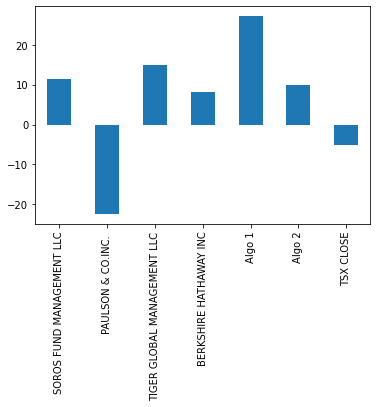

In [100]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_df.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [101]:
# Reading data from 1st stock
shopify_returns_csv = Path("Resources/shop_historical.csv")

shopify_pd = pd.read_csv(shopify_returns_csv, index_col = "Date", parse_dates=True)
shopify_pd = shopify_pd.drop(columns=["Symbol"])
shopify_pd.head()
#shopify_pd.head()


,Close
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [102]:
# Reading data from 2nd stock
otex_returns_csv =  Path("Resources/otex_historical.csv")
otex_pd = pd.read_csv(otex_returns_csv, index_col = "Date", parse_dates=True)
otex_pd = otex_pd.drop(columns=["Symbol"])
otex_pd.head()

,Close
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [103]:
# Reading data from 3rd stock
l_returns_csv =  Path("Resources/l_historical.csv")
l_pd = pd.read_csv(l_returns_csv, index_col = "Date", parse_dates=True)
l_pd = l_pd.drop(columns=["Symbol"])
l_pd.head()

,Close
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [104]:
# Combine all stocks in a single DataFrame
combine_stocks_df= pd.concat([shopify_pd, otex_pd, l_pd], axis = "columns", join = "inner")

print(combine_stocks_df)

             Close  Close  Close
Date                            
2018-01-02  132.06  43.58  57.99
2018-01-03  135.15  43.07  57.41
2018-01-04  137.46  42.91  57.42
2018-01-05  137.26  42.57  57.42
2018-01-08  139.51  42.16  56.86
...            ...    ...    ...
2019-12-20  513.22  58.68  67.90
2019-12-23  511.62  57.89  67.68
2019-12-24  525.39  57.44  67.67
2019-12-27  534.76  57.70  67.78
2019-12-30  517.79  57.19  67.33

[501 rows x 3 columns]


In [105]:
# Reset Date index
combine_stocks_df.sort_index(inplace=True)


In [106]:
# Reorganize portfolio data by having a column per symbol
combine_stocks_df.columns = ['Shopify Close','OTEX Close', 'L Close']
combine_stocks_df.head()

,Shopify Close,OTEX Close,L Close
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [107]:
# Calculate daily returns
stocks_daily_returns = combine_stocks_df.pct_change()
stocks_daily_returns.head()

,Shopify Close,OTEX Close,L Close
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753


In [108]:
#Drop Na
stocks_daily_returns.dropna(inplace=True)
stocks_daily_returns.head()
#display Sample Data
stocks_daily_returns.head()


,Shopify Close,OTEX Close,L Close
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [123]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = stocks_daily_returns.dot(weights)
#portfolio_returns.renameweighted r
# Display sample data
#print(portfolio_returns.columns)
print(portfolio_returns.head())

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [110]:
# Join your returns DataFrame to the original returns DataFrame
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
#total_returns = pd.concat([whale_pd, algo_pd, daily_returns], axis = "columns", join = "inner")
#total_returns.head()

combined_total_portfolios_return = pd.concat([total_returns, portfolio_returns], axis = "columns", join = "inner")

combined_total_portfolios_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX CLOSE,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999


In [112]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_total_portfolios_return.dropna(inplace=True)

combined_total_portfolios_return.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
TSX CLOSE                      0
0                              0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [120]:
#cumalative Returns
combined_portfolios_cumalative_returns = (1 + combined_total_portfolios_return).cumprod() - 1
#combined_portfolios_cumalative_returns.columns=("SFM", "PCI", "TGML", "BHI", "Algo1","Algo2" , "TSX, "Mportfolio")
print(combined_portfolios_cumalative_returns)
#cummaltive standard deviation
combined_portfolios_cumalative_std = combined_portfolios_cumalative_returns.std()
#combined_portfolios_cumalative_std.head()
# Calculate the annualized `std`
combined_portfolios_annual_std = combined_portfolios_cumalative_std * np.sqrt(252)
print(combined_portfolios_annual_std)


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-01-03                   0.004658            0.000027   
2018-01-04                   0.003739            0.004224   
2018-01-05                   0.007826            0.005050   
2018-01-08                   0.012333            0.001293   
2018-01-09                   0.011293            0.002166   
...                               ...                 ...   
2019-04-25                  -0.032216           -0.072963   
2019-04-26                  -0.024329           -0.064470   
2019-04-29                  -0.023105           -0.061926   
2019-04-30                  -0.024370           -0.064000   
2019-05-01                  -0.030074           -0.065256   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-01-03                     0.001979             

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation
combined_portfolios_21std = combined_portfolios_cumalative_returns.rolling(window=21).std()
print(combined_portfolios_21std)

# Plot rolling standard deviation
combined_portfolios_21std.plot(figsize = (10,10))


### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX CLOSE,0
SOROS FUND MANAGEMENT LLC,1.000000,0.801991,0.702475,0.836624,-0.617272,0.872696,0.658362,-0.290562
PAULSON & CO.INC.,0.801991,1.000000,0.773930,0.555235,-0.588286,0.812773,0.582632,-0.397579
TIGER GLOBAL MANAGEMENT LLC,0.702475,0.773930,1.000000,0.539299,-0.887703,0.614170,0.258681,-0.774784
BERKSHIRE HATHAWAY INC,0.836624,0.555235,0.539299,1.000000,-0.609367,0.875799,0.714434,-0.190660
Algo 1,-0.617272,-0.588286,-0.887703,-0.609367,1.000000,-0.598549,-0.158172,0.840200
Algo 2,0.872696,0.812773,0.614170,0.875799,-0.598549,1.000000,0.815509,-0.191997
TSX CLOSE,0.658362,0.582632,0.258681,0.714434,-0.158172,0.815509,1.000000,0.265092
0,-0.290562,-0.397579,-0.774784,-0.190660,0.840200,-0.191997,0.265092,1.000000


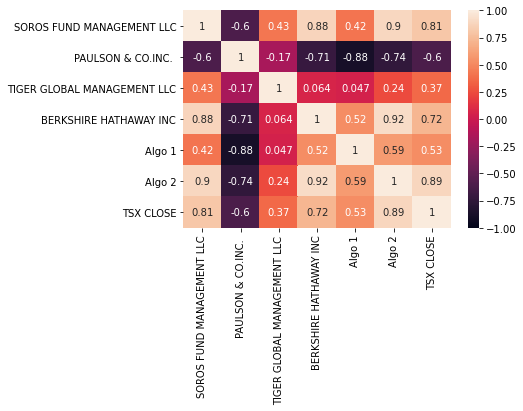

In [68]:
# Calculate and plot the correlation
import seaborn as sns

correlation_portfolio = combined_portfolios_cumalative_returns.corr()

# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1, annot= True)
correlation_portfolio

In [124]:
# Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX
%matplotlib inline

#Print(comb
# Calculate covariance of a single portfolio
#covariance = combined_portfolios_cumalative_returns["0"].cov(cumalative_returns["TSX CLOSE"])
#covariance
#cumalative_returns.rolling(window=21)
# Calculate variance of S&P TSX
#variance = cumalative_returns["TSX CLOSE"].var()
#variance
# Computing beta
#bks_beta = (covariance / variance).round(2)
#print(bks_beta)


#cumalative_returns.rolling(window=21)

KeyError: '0'

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [71]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_combined = (combined_portfolios_cumalative_returns.mean() * 252) / (combined_portfolios_cumalative_returns.std() * np.sqrt(252))
sharpe_ratios_combined.sort_values()

TIGER GLOBAL MANAGEMENT LLC   -25.363578
PAULSON & CO.INC.             -22.606655
TSX CLOSE                     -16.592780
SOROS FUND MANAGEMENT LLC     -15.153337
Algo 2                         -1.455706
BERKSHIRE HATHAWAY INC          0.449602
Algo 1                         16.226821
0                              24.066113
dtype: float64

<AxesSubplot:>

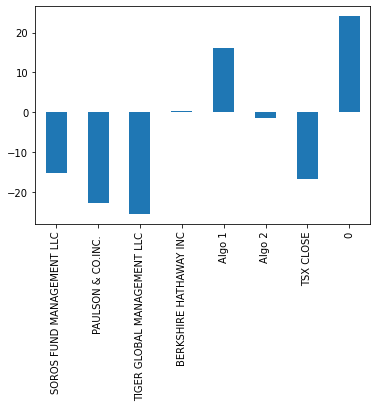

In [72]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_combined.plot.bar()

### How does your portfolio do?

Write your answer here!

In [ ]:
The Portfolio combining Shopify, loblaws and Open Text will provide a much higher return than the other portfolios and keeping the S&P TSX as the Base for comparison